In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
list = [1, 2, 3]
# np.random.choice?

df = pd.read_excel('data/demo_quant.xlsx')
# Drop the empty slots 25 > to 22
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df.tail()


,Low,Medium,High
18,1.279188e+06,1.421320e+06,1.634518e+06
19,8.367014e+05,9.296683e+05,1.069119e+06
20,1.571953e+06,1.746614e+06,2.008606e+06
21,4.759524e+05,5.288360e+05,6.081614e+05
22,9.757024e+04,1.084114e+05,1.246731e+05


In [3]:
# Randomly pick the column name
for i in range(len(df.columns)):
    print(i)

df.iloc[0, 1]
df.shape[0]

0
1
2


23

# Running the simulation only on Low, Medium, High outputs

In [4]:
total_sims = np.zeros(2000)
for i in range(2000):
    sim_cost = np.zeros(df.shape[0])
    for index, row in df.iterrows():
        rc = df.iloc[index, np.random.choice(range(len(df.columns)))]
        sim_cost[index] = rc
    total_sims[i] = sim_cost.sum()


(array([  7.,  17.,  29.,  62., 116., 137., 181., 196., 235., 214., 182.,
        194., 138., 120.,  83.,  45.,  25.,   9.,   9.,   1.]),
 array([20214373.14568223, 20426640.9718819 , 20638908.79808156,
        20851176.62428123, 21063444.45048089, 21275712.27668056,
        21487980.10288022, 21700247.92907989, 21912515.75527956,
        22124783.58147922, 22337051.40767889, 22549319.23387855,
        22761587.06007822, 22973854.88627788, 23186122.71247755,
        23398390.53867722, 23610658.36487688, 23822926.19107655,
        24035194.01727621, 24247461.84347588, 24459729.66967554]),
 <a list of 20 Patch objects>)

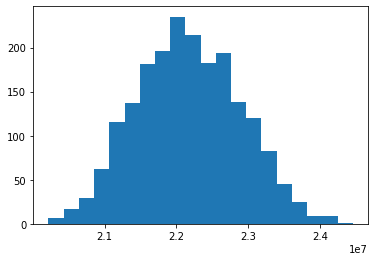

In [5]:
total_sims = pd.Series(total_sims)
plt.hist(total_sims, bins=20)

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    #x-data for the ECDF : x
    x = np.sort(data)
    #y-data for ecdf : y
    y = np.arange(1, n+1) / n
    return x, y

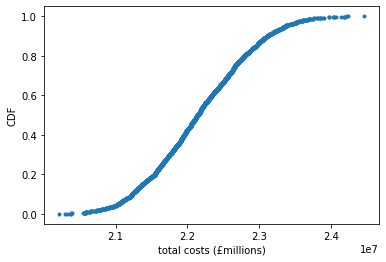

In [7]:
ts_x, ts_y = ecdf(total_sims)
plt.plot(ts_x, ts_y, marker='.', linestyle='none')
plt.xlabel('total costs (£millions)')
plt.ylabel('CDF')
plt.show()

# Running model against Low, Medium, High costs, including Estimated uncertainty

The model summary given appears to work with both low, medium (most likely) and high costs, but it also seems to include estimated uncertainty as a separate one.

In [11]:
df1 = pd.read_excel('data/demo_quant_eu.xlsx')
# Drop the empty slots 25 - 22
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1.drop(['index'], axis=1, inplace=True)

,EU L,EU H,Low,Medium,High
3,-0.10,0.15,6.438260e+05,7.153622e+05,8.226666e+05
4,-0.10,0.15,4.381845e+06,4.868717e+06,5.599025e+06
5,-0.10,0.15,1.406315e+06,1.562573e+06,1.796959e+06
6,-0.10,0.15,4.413078e+05,4.903420e+05,5.638933e+05
7,-0.10,0.15,2.591597e+05,2.879552e+05,3.311485e+05
8,-0.25,0.25,7.417555e+04,9.890074e+04,1.236259e+05
9,-0.10,0.15,1.286036e+05,1.428929e+05,1.643268e+05
10,-0.10,0.15,3.393455e+05,3.770506e+05,4.336082e+05
11,-0.10,0.15,1.780892e+06,1.978768e+06,2.275584e+06
12,-0.10,0.15,7.150793e+05,7.945326e+05,9.137124e+05


In [26]:
total_sims = np.zeros(2000)
for i in range(2000):
    sim_cost = np.zeros(df1.shape[0])
    for index, row in df.iterrows():
        eu = df1.iloc[index, np.random.choice(range(0, 2))]
        rc = df1.iloc[index, np.random.choice(range(2, 5))]
        sim_cost[index] = rc + (eu * rc)
    total_sims[i] = sim_cost.sum()


In [27]:
# Verify 
# df1.iloc[0, 1] * df1.iloc[0, 4] + df1.iloc[0, 4]
# df1.iloc[0, 0] * df1.iloc[0, 4] + df1.iloc[0, 4]

(array([  3.,   8.,  20.,  48.,  82., 126., 205., 246., 240., 250., 195.,
        179., 130., 126.,  52.,  37.,  22.,  23.,   4.,   4.]),
 array([19277182.99918767, 19645516.32804127, 20013849.65689487,
        20382182.98574847, 20750516.31460207, 21118849.64345567,
        21487182.97230927, 21855516.30116287, 22223849.63001647,
        22592182.95887007, 22960516.28772367, 23328849.61657727,
        23697182.94543087, 24065516.27428447, 24433849.60313807,
        24802182.93199167, 25170516.26084527, 25538849.58969887,
        25907182.91855247, 26275516.24740607, 26643849.57625967]),
 <a list of 20 Patch objects>)

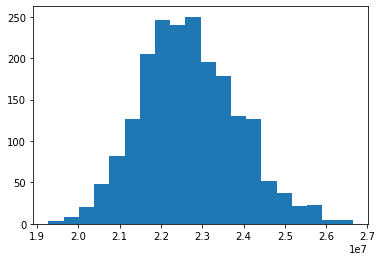

In [28]:
total_sims = pd.Series(total_sims)
plt.hist(total_sims, bins=20)


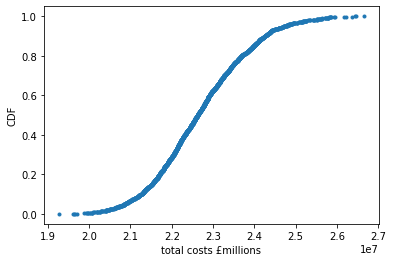

In [29]:
ts_x, ts_y = ecdf(total_sims)
plt.plot(ts_x, ts_y, marker='.', linestyle='none')
plt.xlabel('total costs £millions')
plt.ylabel('CDF')
plt.show()

In [30]:
total_sims.mean()

22700073.397782914

In [31]:
total_sims.median()

22627968.725598253

In [32]:
total_sims.max()

26643849.576259673